In [18]:
import pandas as pd
import glob
import os
#from bs4 import BeautifulSoup as b
from pyproj import Proj 
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp
#import pytess
from shapely.geometry import Polygon
from matplotlib.lines import Line2D
from matplotlib.artist import Artist
from matplotlib.mlab import dist_point_to_segment
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import shapefile
import glob
from descartes import PolygonPatch
from shapely.ops import cascaded_union
from rtree import index
from shapely.geometry import Point
from shapely.ops import cascaded_union
from itertools import combinations
from shapely.ops import polygonize, unary_union

In [19]:
surveys = pd.read_json("G:/drone/surveys/images.json")

In [20]:
def get_longitude(item):
    longitude =float(item[0]) + float(item[2][0:-1])/60 + float(item[3][0:-1])/3600
    return (longitude)

surveys['longitude'] = pd.np.NAN
surveys['latitude'] = pd.np.NAN
surveys.loc[ ~surveys['GPSLongitude'].isna(),'longitude']=surveys.loc[ ~surveys['GPSLongitude'].isna(),'GPSLongitude'].str.split(' ',expand=True).apply(get_longitude,axis=1)
surveys.loc[ ~surveys['GPSLatitude'].isna(),'latitude']=surveys.loc[ ~surveys['GPSLatitude'].isna(),'GPSLatitude'].str.split(' ',expand=True).apply(get_longitude,axis=1)*-1
surveys =surveys[~surveys.longitude.isna()]


In [21]:
myProj = Proj("+proj=utm +zone=49K, +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
surveys['easting'], surveys['northing'] = myProj(surveys['longitude'].values, surveys['latitude'].values)


In [22]:
surveys.to_csv(r'C:\Users\BEA200\Desktop\turtle\python\table\test\poly.csv')

In [15]:
%matplotlib notebook
#neds only 
#mask = (surveys.latitude>-21.964) & (surveys.latitude<-21.954)
#surveys = pd.DataFrame(surveys.loc[mask])
surveys['BaseName']=surveys.SourceFile.apply(os.path.basename)
surveys['BaseName']=surveys['BaseName'].str[0:-4]
surveys['area']=surveys['BaseName'].str.split('_',expand=True)[0]

In [6]:
#surveys.BaseName.str.contains('mb').max()
surveys

,About,AbsoluteAltitude,AlreadyApplied,Aperture,ApertureValue,BitsPerSample,CalibratedFocalLength,CalibratedOpticalCenterX,CalibratedOpticalCenterY,CamReverse,...,YCbCrPositioning,YCbCrSubSampling,YResolution,Yaw,longitude,latitude,easting,northing,BaseName,area
0,DJI Meta Data,-20.00,False,6.3,6.3,8,3666.666504,2432.0,1824.0,0,...,Centered,YCbCr4:2:2 (2 1),72,-67.9,113.940256,-21.961719,803673.709436,7.568494e+06,mbay_20181013T073611_2090,mbay
1,DJI Meta Data,-52.27,False,6.3,6.3,8,3666.666504,2432.0,1824.0,0,...,Centered,YCbCr4:2:2 (2 1),72,-60.3,113.940283,-21.961694,803676.633396,7.568497e+06,mbay_20181015T073417_3634,mbay
2,DJI Meta Data,16.94,False,5.6,5.6,8,3666.666504,2432.0,1824.0,0,...,Centered,YCbCr4:2:2 (2 1),72,-72.0,113.931967,-21.958275,802824.387700,7.568892e+06,mbay_20181014T082933_3548,mbay
3,DJI Meta Data,16.94,False,5.0,5.0,8,3666.666504,2432.0,1824.0,0,...,Centered,YCbCr4:2:2 (2 1),72,105.9,113.935675,-21.961672,803200.423030,7.568509e+06,mbay_20181014T075841_3197,mbay
4,DJI Meta Data,17.04,False,5.6,5.6,8,3666.666504,2432.0,1824.0,0,...,Centered,YCbCr4:2:2 (2 1),72,106.2,113.934686,-21.962331,803096.826049,7.568438e+06,mbay_20181014T075241_3061,mbay
5,DJI Meta Data,16.74,False,5.6,5.6,8,3666.666504,2432.0,1824.0,0,...,Centered,YCbCr4:2:2 (2 1),72,-71.7,113.936450,-21.959544,803285.039121,7.568743e+06,mbay_20181014T082754_3509,mbay
6,DJI Meta Data,16.94,False,5.0,5.0,8,3666.666504,2432.0,1824.0,0,...,Centered,YCbCr4:2:2 (2 1),72,106.3,113.936744,-21.961039,803312.293053,7.568577e+06,mbay_20181014T080454_3338,mbay
7,DJI Meta Data,16.94,False,5.6,5.6,8,3666.666504,2432.0,1824.0,0,...,Centered,YCbCr4:2:2 (2 1),72,-71.9,113.935169,-21.961058,803149.479628,7.568578e+06,mbay_20181014T080016_3230,mbay
8,DJI Meta Data,16.94,False,5.6,5.6,8,3666.666504,2432.0,1824.0,0,...,Centered,YCbCr4:2:2 (2 1),72,-72.1,113.933831,-21.960681,803011.911317,7.568622e+06,mbay_20181014T080046_3242,mbay
9,DJI Meta Data,16.94,False,6.3,6.3,8,3666.666504,2432.0,1824.0,0,...,Centered,YCbCr4:2:2 (2 1),72,106.3,113.930678,-21.961194,802684.989926,7.568571e+06,mbay_20181014T075111_3026,mbay


select only the object in all mb images

In [7]:
#files = glob.glob(r'G:\drone\surveys\mangrouve_bay\s*\*.jpg',recursive=True)
#len(files)

In [8]:
#turtles =pd.DataFrame(files,columns=['path'])
#turtles['BaseName']=turtles.path.apply(os.path.basename)
#turtles['BaseName']=turtles['BaseName'].str[0:-4]
#surveys =turtles.merge(surveys,on=['BaseName'])
#surveys

In [16]:
def to_real_wrold(index,altitude,focallen):
    return (index/focallen)*altitude

def make_image_poly(item):
    xw =float(item.ImageWidth)/2
    yw=float(item.ImageHeight)/2
    x = to_real_wrold(np.array([xw,xw,-xw,-xw]),item.RelativeAltitude,item.CalibratedFocalLength)
    y = to_real_wrold(np.array([yw,-yw,-yw,yw]),item.RelativeAltitude,item.CalibratedFocalLength)
    rads = np.deg2rad(item.FlightYawDegree)
    xx = (x * np.cos(rads) +  y * np.sin(rads))+ item.easting 
    yy = (-x * np.sin(rads)  +  y  * np.cos(rads))+ item.northing

    return Polygon(zip(xx,yy))


surveys['Polygon'] = surveys.apply(make_image_poly,axis=1)


    
    

IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not form a closed linestring
Shell is not a LinearRing
IllegalArgumentException: Points of LinearRing do not f

In [17]:
surveys.to_csv(r'C:\Users\BEA200\Desktop\turtle\python\table\test\poly.csv')

ValueError: Null geometry supports no operations

<IPython.core.display.Javascript object>


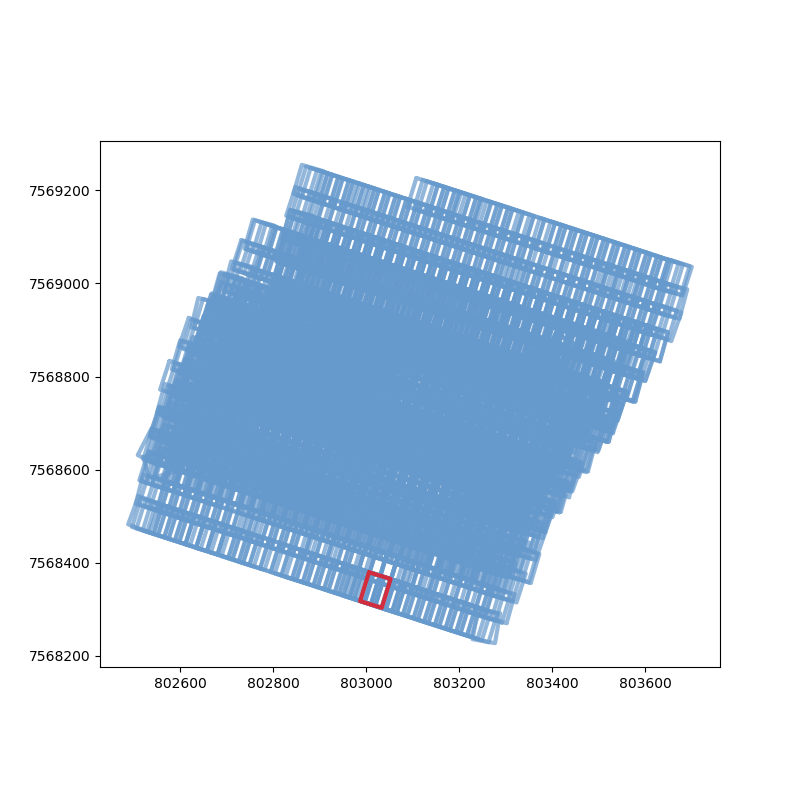

In [10]:
fig, ax = plt.subplots(figsize=(8,8))

for index,row in surveys.iterrows():
    (x,y)=row.Polygon.exterior.xy
    ax.plot(x, y, color='#6699cc', alpha=0.7,
        linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect(1)



In [11]:
surveys.index =pd.to_datetime(surveys.BaseName.str.split('_',expand=True)[1],format='%Y%m%dT%H%M%S')

In [21]:
surveys.sort_index(inplace=True)
item = surveys.iloc[22]

In [22]:
item.DateTimeOriginal


'2018:10:12 07:40:56'

In [23]:
surveys[abs((surveys.index - item.name).total_seconds())<10]

,About,AbsoluteAltitude,AlreadyApplied,Aperture,ApertureValue,BitsPerSample,CalibratedFocalLength,CalibratedOpticalCenterX,CalibratedOpticalCenterY,CamReverse,...,YCbCrSubSampling,YResolution,Yaw,longitude,latitude,easting,northing,BaseName,area,Polygon
1,,,,,,,,,,,,,,,,,,,,,
2018-10-12 07:40:48,DJI Meta Data,18.21,False,5.0,5.0,8,3666.666504,2432.0,1824.0,0,...,YCbCr4:2:2 (2 1),72,-72.8,113.934272,-21.963303,803051.987197,7.568331e+06,mbay_20181012T074048_1244,mbay,"POLYGON ((803038.3126451324 7568369.047486307,..."
2018-10-12 07:40:51,DJI Meta Data,18.21,False,5.0,5.0,8,3666.666504,2432.0,1824.0,0,...,YCbCr4:2:2 (2 1),72,-72.8,113.934183,-21.963278,803042.854019,7.568334e+06,mbay_20181012T074051_1245,mbay,"POLYGON ((803029.1794664804 7568371.993365609,..."
2018-10-12 07:40:53,DJI Meta Data,18.11,False,5.0,5.0,8,3666.666504,2432.0,1824.0,0,...,YCbCr4:2:2 (2 1),72,-72.7,113.934047,-21.963239,803028.870124,7.568338e+06,mbay_20181012T074053_1246,mbay,"POLYGON ((803015.2901309105 7568376.51724166, ..."
2018-10-12 07:40:56,DJI Meta Data,18.11,False,5.0,5.0,8,3666.666504,2432.0,1824.0,0,...,YCbCr4:2:2 (2 1),72,-72.9,113.933958,-21.963214,803019.736938,7.568341e+06,mbay_20181012T074056_1247,mbay,"POLYGON ((803006.0236831727 7568379.415470827,..."
2018-10-12 07:40:58,DJI Meta Data,18.01,False,5.0,5.0,8,3666.666504,2432.0,1824.0,0,...,YCbCr4:2:2 (2 1),72,-72.8,113.933825,-21.963175,803006.040104,7.568346e+06,mbay_20181012T074058_1248,mbay,"POLYGON ((802992.4213665149 7568383.933938504,..."
2018-10-12 07:41:01,DJI Meta Data,18.11,False,5.6,5.6,8,3666.666504,2432.0,1824.0,0,...,YCbCr4:2:2 (2 1),72,-72.7,113.933736,-21.963150,802996.906911,7.568349e+06,mbay_20181012T074101_1249,mbay,"POLYGON ((802983.3269184255 7568386.981620088,..."
2018-10-12 07:41:03,DJI Meta Data,18.21,False,5.6,5.6,8,3666.666504,2432.0,1824.0,0,...,YCbCr4:2:2 (2 1),72,-72.7,113.933603,-21.963114,802983.204168,7.568353e+06,mbay_20181012T074103_1250,mbay,"POLYGON ((802969.5964040284 7568391.324629196,..."


In [175]:
item.name

Timestamp('2018-10-12 07:40:56')

<IPython.core.display.Javascript object>


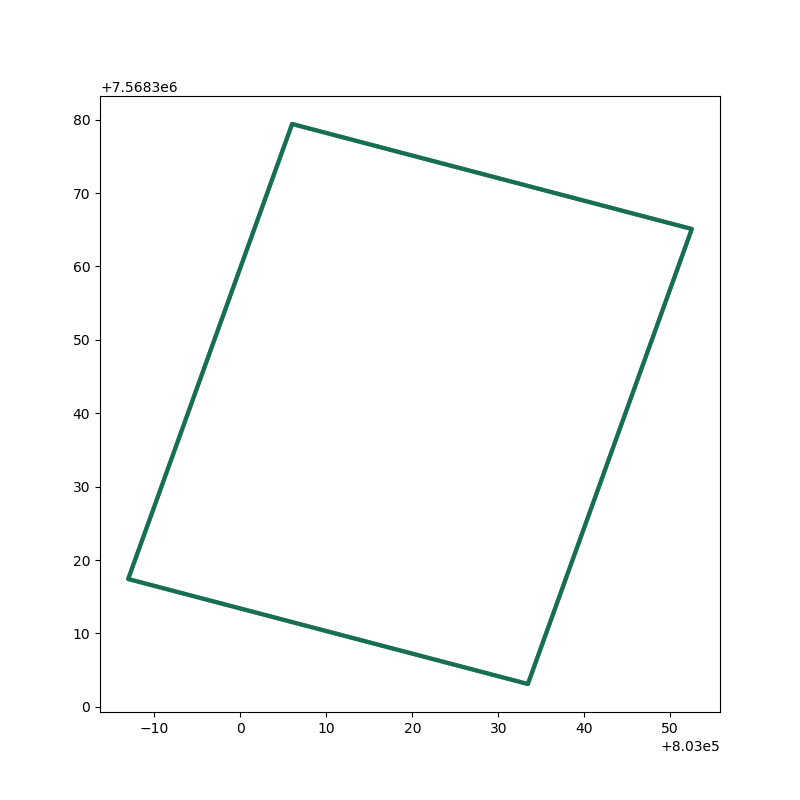

NameError: name 'csymmetric_difference' is not defined

In [118]:
fig, ax = plt.subplots(figsize=(8,8))

stack =[]
for index,row in surveys[(surveys.Polygon.apply(item.Polygon.intersects)) & (abs((surveys.index - item.name).total_seconds())<100) ].iterrows():
    (x,y)=row.Polygon.exterior.xy
    stack.append(row.Polygon.intersection(item.Polygon))

stack =list(filter(lambda x: x.area > 500, stack))


p = item.Polygon
(x,y)=p.exterior.xy
ax.plot(x, y, color='blue', alpha=0.7,
linewidth=3, solid_capstyle='round', zorder=2)


(x,y)=nonoverlap.exterior.xy
ax.plot(x, y, color='green', alpha=0.7,
linewidth=3, solid_capstyle='round', zorder=2)

group =[]
for i in range(1,len(stack)):
    group.append(stack[i].difference(stack[i-1].exterior))

g = (csymmetric_difference(stack[0])).difference(stack[0])

(x,y)=g.exterior.xy
ax.plot(x, y, color='green', alpha=0.7,
linewidth=3, solid_capstyle='round', zorder=2)
    
# (x,y)=stack[1].exterior.xy
# ax.plot(x, y, color='red', alpha=0.7,
#    linewidth=3, solid_capstyle='round', zorder=2)
# ax.set_aspect(1)



<IPython.core.display.Javascript object>


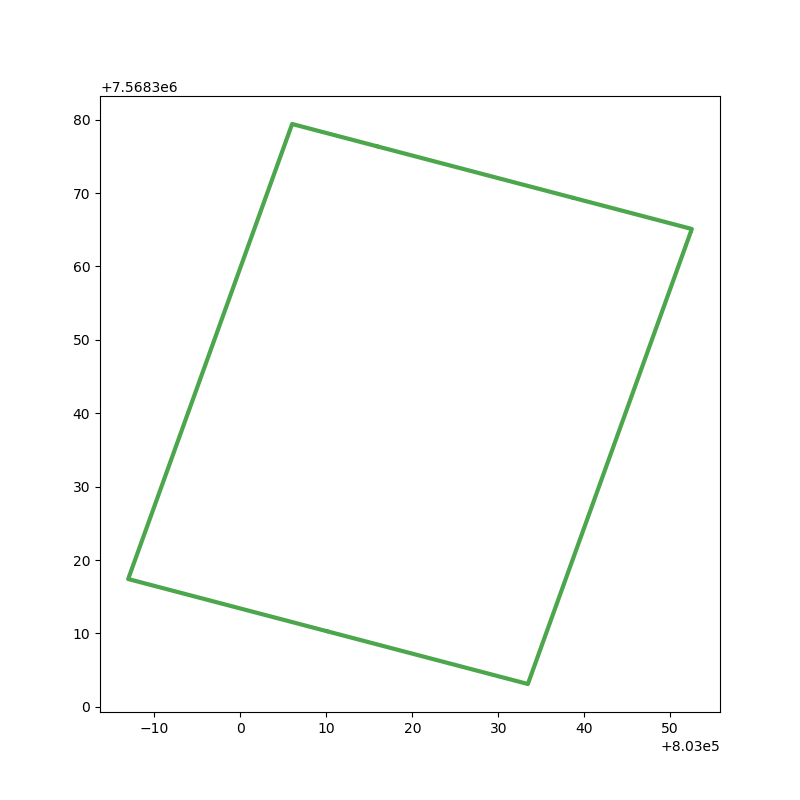

In [115]:
# All intersections
inter = cascaded_union(stack[0].intersection(stack[1]) )
for i in range(1,len(stack)):
    nonoverlap = cascaded_union(stack).difference(inter)
# Remove from union of all shapes
p = item.Polygon
(x,y)=p.exterior.xy
ax.plot(x, y, color='blue', alpha=0.7,
linewidth=3, solid_capstyle='round', zorder=2)

fig, ax = plt.subplots(figsize=(8,8))
(x,y)=nonoverlap.exterior.xy
ax.plot(x, y, color='green', alpha=0.7,
linewidth=3, solid_capstyle='round', zorder=2)

<IPython.core.display.Javascript object>


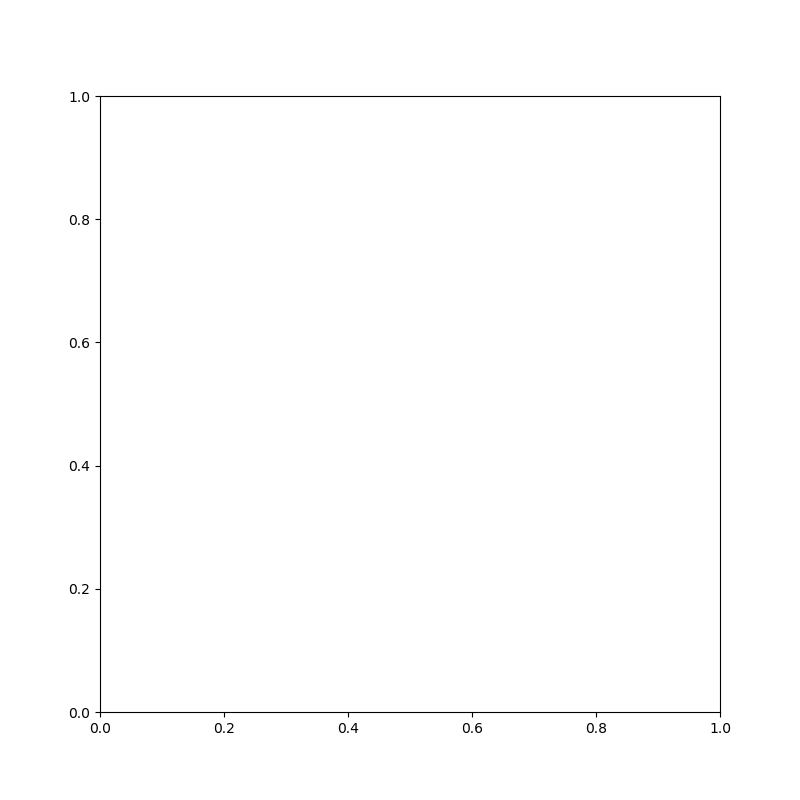

AttributeError: 'list' object has no attribute 'exterior'

In [126]:
ext=list(polygonize(unary_union(list(x.exterior for x in stack))))
fig, ax = plt.subplots(figsize=(8,8))
(x,y)=ext.exterior.xy
ax.plot(x, y, color='green', alpha=0.7,
linewidth=3, solid_capstyle='round', zorder=2)

In [128]:
shapely.geometry.polygon.Polygon

NameError: name 'shapely' is not defined

In [31]:
fig, ax = plt.subplots(figsize=(8,8))

for index,row in surveys[(surveys.Polygon.apply(item.Polygon.intersects)) & (abs((surveys.index - item.name).total_seconds())<100) ].iterrows():
    (x,y)=row.Polygon.exterior.xy


(array('d', [802960.4968739161, 803006.9469957113, 802987.6568598966, 802941.2067381014, 802960.4968739161]),
 array('d', [7568394.500098053, 7568380.0324961925, 7568318.099000465, 7568332.566602326, 7568394.500098053]))

In [36]:
surveys['Polygonint']=item.Polygon.intersects (abs((surveys.index - item.name).total_seconds())<10) 

AttributeError: 'numpy.ndarray' object has no attribute '_geom'

In [34]:
surveys['Polygonint']

1
2018-10-12 07:38:04    <bound method BaseGeometry.intersects of <shap...
2018-10-12 07:40:03    <bound method BaseGeometry.intersects of <shap...
2018-10-12 07:40:06    <bound method BaseGeometry.intersects of <shap...
2018-10-12 07:40:08    <bound method BaseGeometry.intersects of <shap...
2018-10-12 07:40:11    <bound method BaseGeometry.intersects of <shap...
2018-10-12 07:40:13    <bound method BaseGeometry.intersects of <shap...
2018-10-12 07:40:16    <bound method BaseGeometry.intersects of <shap...
2018-10-12 07:40:18    <bound method BaseGeometry.intersects of <shap...
2018-10-12 07:40:21    <bound method BaseGeometry.intersects of <shap...
2018-10-12 07:40:23    <bound method BaseGeometry.intersects of <shap...
2018-10-12 07:40:26    <bound method BaseGeometry.intersects of <shap...
2018-10-12 07:40:28    <bound method BaseGeometry.intersects of <shap...
2018-10-12 07:40:31    <bound method BaseGeometry.intersects of <shap...
2018-10-12 07:40:33    <bound method BaseGeometry

In [15]:
polygon_shape.intersection('gridcell_shape').area

NameError: name 'polygon_shape' is not defined

<IPython.core.display.Javascript object>


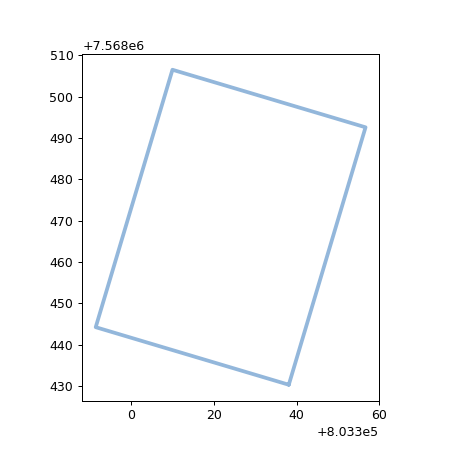

In [16]:
fig = plt.figure(3, figsize=(5,5), dpi=90)
ax = fig.add_subplot(111)

(x,y)=item.Polygon.exterior.xy
ax.plot(x, y, color='#6699cc', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)
ax.set_aspect(1)


In [18]:
item.Polygon.exterior.xy

(array('d', [803338.0745284966, 803291.3557781973, 803309.9257306758, 803356.6444809751, 803338.0745284966]),
 array('d', [7568430.315738696, 7568444.243203055, 7568506.534870121, 7568492.607405761, 7568430.315738696]))

In [23]:
def get_path(item):
    return os.path.split(item)[0]


#surveys['dir']=output['path_x'].apply(get_path)
surveys['dir']=surveys['BaseName'].apply(get_path)

<IPython.core.display.Javascript object>


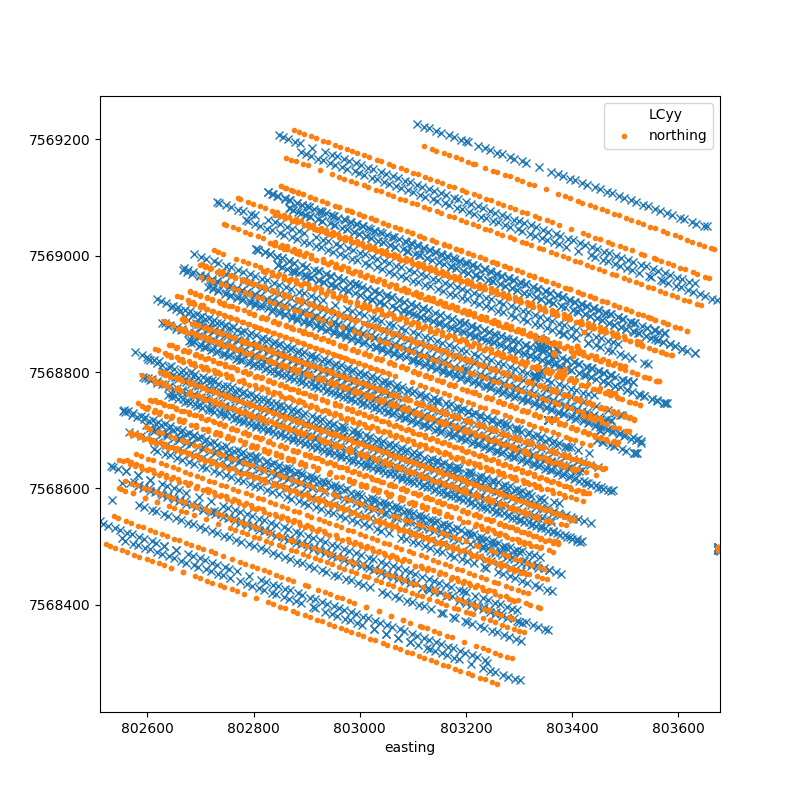

dir
    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

In [24]:
fig, ax = plt.subplots(figsize=(8,8))
surveys.groupby('dir').plot(x='LCxx',y='LCyy',marker ='x',linestyle='',ax=ax)
surveys.groupby('dir').plot(x='easting',y='northing',marker ='.',linestyle='',ax=ax)

In [25]:
corner= surveys[['LCxx','LCyy', 'RCxx', 'RCyy', 'LDCxx', 'LDCyy', 'RDCxx', 'RDCyy']]

In [27]:
def createPolygon(row):
#     print(row)
    return Polygon(zip(row[['LCxx','LDCxx','RCxx','RDCxx']],row[['LCyy','LDCyy','RCyy','RDCyy']]))

surveys['polygons']=corner.apply(createPolygon,axis=1)


c:\users\bea200\appdata\local\continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [30]:
corner.to_csv(r'C:\Users\BEA200\Desktop\turtle\python\table\corner.csv')


<IPython.core.display.Javascript object>


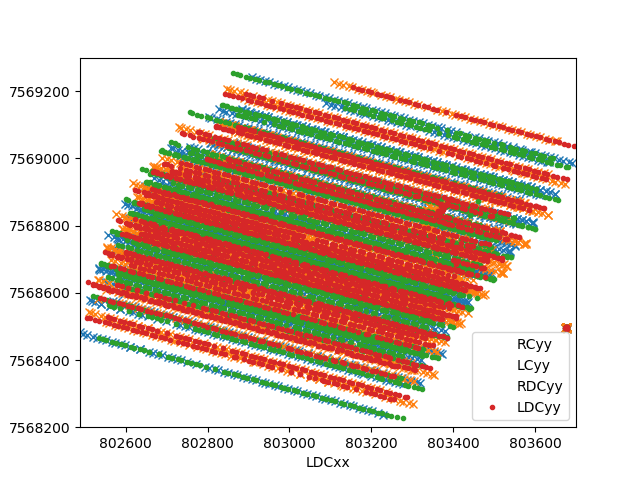

In [29]:

fig, ax = plt.subplots()#figsize=(8,8))    
plt.axis([802200, 803800, 7568200, 7569300])
corner.plot(x='RCxx',y='RCyy',marker ='x',linestyle='',ax=ax)
corner.plot(x='LCxx',y='LCyy',marker ='x',linestyle='',ax=ax)
corner.plot(x='RDCxx',y='RDCyy',marker ='.',linestyle='',ax=ax)
corner.plot(x='LDCxx',y='LDCyy',marker ='.',linestyle='',ax=ax)



#(polygons)    p = PolygonInteractor(ax, polygons)
#corner.plot ('polygons',linestyle='',ax=ax)

In [57]:
poly = plt.corner.polygons



AttributeError: module 'matplotlib.pyplot' has no attribute 'corner'

In [66]:
polygons


NameError: name 'polygons' is not defined

In [70]:
def intersectPolygon(row):
#     print(row)
    return  intersect(polygons)
corner['intersect']=corner.apply(intersectPolygon,axis=1)
print ((corner.polygons).intersect(corner.polygons))
#corner['intersect']=corner.apply(createPolygon,axis=1)

#p1 = Polygon([(0,0), (1,1), (1,0)])
#p2 = Polygon([(0,1), (1,0), (1,1)])
#(p1.intersects(p2))


NameError: ("name 'intersect' is not defined", 'occurred at index 0')

In [9]:
import pdb
import mymodule
pdb.run'mymodule.test(r"C:\Users\BEA200\Desktop\turtle\python\Untitled.ipynb"'


SyntaxError: invalid syntax (<ipython-input-9-5d1d055312a8>, line 3)